<a href="https://colab.research.google.com/github/calzateu/Numerical_Analysis/blob/main/code/Sentiment_analysis/Logistic_regression_new_videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd

In [140]:
data = pd.read_csv('Dataset-with-sentiments.csv')

In [141]:
sum(data['stop_comments'].isnull())

0

In [142]:
data = data[data['stop_comments'].notnull()]

In [143]:
sum(data['stop_comments'].isnull())

0

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [146]:
X_train.shape

(5794,)

In [147]:
X_test.shape

(1449,)

In [148]:
data['pol_cat'].value_counts()

1    3715
0    3528
Name: pol_cat, dtype: int64

## **Gonna Apply Logistic Regression**

In [149]:
from sklearn.feature_extraction.text import CountVectorizer

In [150]:
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
#vect = CountVectorizer()
#tf_train = vect.fit_transform(X_train)
#tf_test = vect.transform(X_test)

In [151]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = TfidfVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [152]:
tf_train

<5794x8118 sparse matrix of type '<class 'numpy.float64'>'
	with 69820 stored elements in Compressed Sparse Row format>

In [153]:
tf_train.toarray()[0].sum()

3.109511739791509

In [154]:
#vect?

In [155]:
#vect.get_feature_names()

In [156]:
#X_train[0]

In [157]:
#for i in tf_train.toarray()[0]:
#  if (i != 0):
#    print(i)

In [158]:
tf_train.shape

(5794, 8118)

**Print the Vocabulary**

In [159]:
#print(vect.vocabulary_)

In [160]:
#vocab = vect.vocabulary_

In [161]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')
lr.fit(tf_train,y_train)

LogisticRegression(solver='newton-cg')

**Accuracy score on training dataset**

In [162]:
lr.score(tf_train,y_train)

0.9340697273041076

**Accuracy score on test dataset i.e got from the splitting**

In [163]:
lr.score(tf_test,y_test)

0.8695652173913043

**Make predictions on the test dataset i.e. unseen data to the model**

In [164]:
expected = y_test
predicted = lr.predict(tf_test)

**plot confusion matrix for the test dataset**

In [165]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

In [166]:
pip install mlxtend

[[635 129]
 [ 60 625]]


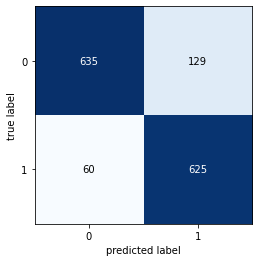

In [167]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [168]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       685
           1       0.91      0.83      0.87       764

    accuracy                           0.87      1449
   macro avg       0.87      0.87      0.87      1449
weighted avg       0.87      0.87      0.87      1449



**find the F1 score**

In [169]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.8695590047349346

# **Test the model with the comments of the other video**

In [170]:
data_test = pd.read_csv('Video_2/Dataset-with-sentiments.csv')

In [171]:
sum(data_test['stop_comments'].isnull())

1

In [172]:
data_test = data_test[data_test['stop_comments'].notnull()]

In [173]:
sum(data_test['stop_comments'].isnull())

0

In [174]:
data_test['pol_cat'].value_counts()

1    832
0    673
Name: pol_cat, dtype: int64

In [175]:
tf_test = vect.transform(data_test['stop_comments'])

In [176]:
tf_test

<1505x8118 sparse matrix of type '<class 'numpy.float64'>'
	with 13797 stored elements in Compressed Sparse Row format>

In [177]:
tf_test.toarray()[0].sum()

1.2038758500686517

In [178]:
tf_train.toarray().shape

(5794, 8118)

In [179]:
tf_test.toarray().shape

(1505, 8118)

In [180]:
lr.score(tf_test, data_test['pol_cat'])

0.8890365448504983

In [181]:
expected = data_test['pol_cat']
predicted = lr.predict(tf_test)

[[726 106]
 [ 61 612]]


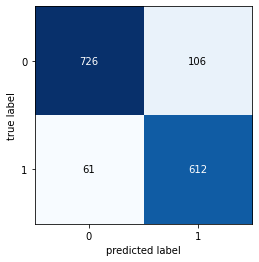

In [182]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [183]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       673
           1       0.92      0.87      0.90       832

    accuracy                           0.89      1505
   macro avg       0.89      0.89      0.89      1505
weighted avg       0.89      0.89      0.89      1505



In [184]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.8883961973846697

# **Now we are going to study the impact of the video**

In [185]:
predicted[predicted==0] = -1

In [186]:
predicted

array([-1, -1,  1, ..., -1, -1,  1])

In [190]:
likes = np.array(list(data_test['Likes']))
likes

array([1, 0, 3, ..., 0, 0, 3])

In [192]:
ponderacion = np.dot(predicted, likes)
ponderacion

132662

In [194]:
num_comentarios_pos = sum(predicted[predicted==1])
num_comentarios_pos

787

In [198]:
num_com_num_likes = sum(predicted[predicted==1])*sum(likes[predicted==1])
num_com_num_likes

316756482

In [199]:
num_com = len(predicted)
num_com

1505

In [200]:
num_likes = sum(likes)
num_likes

672310

In [201]:
(num_comentarios_pos + num_likes)/(num_com + num_likes)

0.9989344256212759